# Youtube Data Exploration & Cleaning

!["Bronze Button"](https://pbs.twimg.com/media/C1WZpigXUAQMQLj.jpg)

## Imports

We locally import the Youtube datasets using Pandas. Thereafter, we utilize Pprint at some point to easily visualize and identify ouput.

The regions of the Youtube video information are the following:

1. Canada

2. United States of America

3. Great Britain

4. France

5. Germany

In [52]:
#Minimum requirements for cleaning

import pandas as pd
import pprint

import matplotlib.pyplot as plt

In [23]:
#Import Canadian, American, British, French, and Germany Youtube video data, respectively

caVideo_df = pd.read_csv("../Data/CAvideos.csv")
usaVideo_df = pd.read_csv("../Data/USvideos.csv")
gbVideo_df = pd.read_csv("../Data/GBvideos.csv")
frVideo_df = pd.read_csv("../Data/FRvideos.csv")
deVideo_df = pd.read_csv("../Data/DEvideos.csv")


## Inspection

We first evaluate the type of features we have for our datasets. Moreover, we identify a few characteristics of the information!

### What features we have available, type of info we have

In [33]:
frVideo_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor|""Dissident""|""Expliquez""|""moi""|""cette""|""...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...


### Total Count of Rows and Features

In [38]:
print("Total of rows and features for Canada:, ",caVideo_df.shape)
print("Total of rows and features for USA:, ",usaVideo_df.shape)
print("Total of rows and features for Great Britain:, ",gbVideo_df.shape)
print("Total of rows and features for France:, ",frVideo_df.shape)
print("Total of rows and features for Germany:, ",deVideo_df.shape)

Total of rows and features for Canada:,  (10592, 16)
Total of rows and features for USA:,  (10600, 16)
Total of rows and features for Great Britain:,  (10593, 16)
Total of rows and features for France:,  (10594, 16)
Total of rows and features for Germany:,  (10597, 16)


We observe discrepancies between the amount of rows for each dataframe. I do not have any future intentions to join the dataset, because they are in no way relational by feature. However, since these dataframes have the same amount of columns. I would like to concantente the information into one dataset, with their Country of origin being the 17th column, for future analysis.

The processing speed to evaluate this information will be slower. However, it is not significant to affect the computational computing for our computers, as seen later 

Hint: Dropping Features

### Descriptive Statistics and Thoughts


IDEA: Make a function to easily build up the visualizations? This would also work in another file by making such a thing a .py file

[43328.312405589124, 47502.104433962268, 70507.231756820547, 15950.496507457052, 20109.812871567425] range(0, 5)


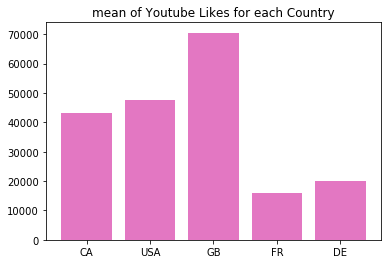

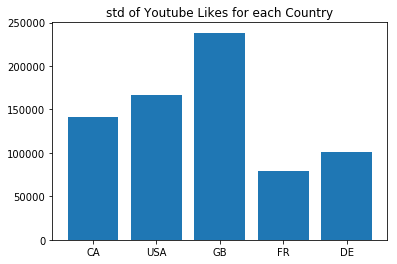

In [116]:
cols = ["views","likes","dislikes","comment_count"]
dtypes = "int64"
country = ["CA", "USA", "GB", "FR","DE"]
def dataframe_stats(columns, stats, countries,dtype ):
    ca_graph = caVideo_df.describe(include = [dtype])[columns]
    usa_graph = usaVideo_df.describe(include = [dtype])[columns]
    gb_graph = gbVideo_df.describe(include = [dtype])[columns]
    fr_graph = frVideo_df.describe(include = [dtype])[columns]
    de_graph = deVideo_df.describe(include = [dtype])[columns]

    temp = [ca_graph, usa_graph, gb_graph, fr_graph, de_graph]

    means = []
    std = []

    for a in stats:
        for i in range(0,5):
            if a is "mean":
                means.append(temp[i].loc[a,"likes"])
            else:
                std.append(temp[i].loc[a,"likes"])
    li = list(ca_graph.columns)
    ina = range(0,5)
    for b in stats:
        plt.xticks(ina, countries )
        plt.title("%s of Youtube Likes for each Country" % b)
        if b is "mean":
            print(means,ina)
            plt.bar(ina, means)
        else:
            plt.bar(ina,std)
        plt.show()
dataframe_stats(cols, stats = ["mean","std"],countries = country, dtype =dtypes)

In [47]:
print("Descriptive Statistics of features for Canada:\n\n ",caVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for USA:\n\n  ",usaVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for Great Britain:\n\n  ",gbVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for France:\n\n ",frVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for Germany:\n\n ",deVideo_df.describe(include = ["int64"]))

Descriptive Statistics of features for Canada:

          category_id         views         likes      dislikes  comment_count
count  10592.000000  1.059200e+04  1.059200e+04  1.059200e+04   10592.000000
mean      20.829494  1.188602e+06  4.332831e+04  2.865920e+03    5673.249717
std        6.782456  4.137523e+06  1.418641e+05  3.466778e+04   25659.394553
min        1.000000  1.141000e+03  0.000000e+00  0.000000e+00       0.000000
25%       20.000000  1.437375e+05  2.154000e+03  1.030000e+02     409.000000
50%       24.000000  3.538290e+05  9.326000e+03  2.990000e+02    1334.000000
75%       24.000000  9.616615e+05  3.030625e+04  1.021250e+03    3940.000000
max       43.000000  1.378431e+08  3.014479e+06  1.602383e+06  827755.000000
Descriptive Statistics of features for USA:

           category_id         views         likes      dislikes  comment_count
count  10600.000000  1.060000e+04  1.060000e+04  1.060000e+04   1.060000e+04
mean      19.966887  1.298616e+06  4.750210e+04  3.2255

In [48]:
print("Data Types of and features for Canada:\n\n  ",caVideo_df.dtypes)
print("Descriptive Statistics of rows and features for USA:\n\n  ",usaVideo_df.dtypes)
print("Descriptive Statistics of rows and features for Great Britain:\n\n ",gbVideo_df.dtypes)
print("Descriptive Statistics of rows and features for France:\n\n  ",frVideo_df.dtypes)
print("Descriptive Statistics of rows and features for Germany:\n\n  ",deVideo_df.dtypes)

Data Types of and features for Canada:

   video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object
Descriptive Statistics of rows and features for USA:

   video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              i

In this portion, we notice that we have a couple of uneccasary piece of information to analyze this data. Moreover, can we identify any trivial information that may be affected due to poor derivation, extraction, or other potential modification? We find out in the **Cleaning** portion

## Cleaning

In [24]:
video_list = [caVideo_df, gbVideo_df, frVideo_df, deVideo_df, usaVideo_df]

caVideo_columns = list(caVideo_df.columns)
gbVideo_columns = list(gbVideo_df.columns)
frVideo_columns = list(frVideo_df.columns)
deVideo_columns = list(deVideo_df.columns)
usaVideo_columns = list(usaVideo_df.columns)

video_list_str = ["caVideo_nullCount", "gbVideo_nullCount", 
              "frVideo_nullCount", "deVideo_nullCount", "usaVideo_nullCount"]

In [ ]:
allVideos_nullCount = {}
for index, videos in enumerate(video_list):
    temp_dic = {}
    for col in videos:
        #temp_dic = {}
        null_val = videos[col].isnull().values.sum()
        temp_dic[col] = null_val
    allVideos_nullCount[video_list_str[index]] = temp_dic

In [25]:
pprint.pprint(allVideos_nullCount )

{'caVideo_nullCount': {'category_id': 0,
                       'channel_title': 0,
                       'comment_count': 0,
                       'comments_disabled': 0,
                       'description': 309,
                       'dislikes': 0,
                       'likes': 0,
                       'publish_time': 0,
                       'ratings_disabled': 0,
                       'tags': 0,
                       'thumbnail_link': 0,
                       'title': 0,
                       'trending_date': 0,
                       'video_error_or_removed': 0,
                       'video_id': 0,
                       'views': 0},
 'deVideo_nullCount': {'category_id': 0,
                       'channel_title': 0,
                       'comment_count': 0,
                       'comments_disabled': 0,
                       'description': 446,
                       'dislikes': 0,
                       'likes': 0,
                       'publish_time': 0,
        

## Export

## Resources